In [ ]:






# logistic regression 

In [1]:
import pandas as pd
import numpy as np

In [2]:
adult_df=pd.read_csv(r'C:\Users\hp\Documents\adult.csv',header=None,delimiter=' *, *',engine='python')
adult_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
pd.set_option('display.max_column',None)

In [4]:
adult_df.shape

(32561, 15)

In [5]:
adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation', 'relationship',
'race', 'sex', 'capital_gain', 'capital_loss',
'hours_per_week', 'native_country', 'income']

adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K














# pre processing the data

In [6]:
adult_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [7]:
adult_df=adult_df.replace(['?'],np.nan)  #if u have a list of missing values in the form of characters we can use [ ] brackest

In [8]:
adult_df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [9]:
#creating a copy of nthe original dataset in order to keep the data intact without any mistakes
adult_df_rev=pd.DataFrame.copy(adult_df)

In [10]:
adult_df_rev=adult_df_rev.drop(['education','fnlwgt'],axis=1)
adult_df_rev.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
for value in ['workclass','occupation',
             'native_country']:
    adult_df_rev[value].fillna(adult_df_rev[value].mode()[0],inplace=True)

In [12]:
adult_df_rev.workclass.mode()

0    Private
dtype: object

In [13]:
adult_df_rev.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [14]:
"""
for x in adult_df_rev.columns[:]:
    if adult_df_rev[x].dtype=='object':
        adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)
    elif adult_df_rev[x].dtype=='int64'|adult_df_rev[x].dtype=='float64':
        adult_df_rev[x].fillna(adult_df_rev[x].mean(),inplace=True)
"""

"\nfor x in adult_df_rev.columns[:]:\n    if adult_df_rev[x].dtype=='object':\n        adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)\n    elif adult_df_rev[x].dtype=='int64'|adult_df_rev[x].dtype=='float64':\n        adult_df_rev[x].fillna(adult_df_rev[x].mean(),inplace=True)\n"

In [15]:
adult_df_rev.workclass.value_counts

<bound method IndexOpsMixin.value_counts of 0               State-gov
1        Self-emp-not-inc
2                 Private
3                 Private
4                 Private
5                 Private
6                 Private
7        Self-emp-not-inc
8                 Private
9                 Private
10                Private
11              State-gov
12                Private
13                Private
14                Private
15                Private
16       Self-emp-not-inc
17                Private
18                Private
19       Self-emp-not-inc
20                Private
21                Private
22            Federal-gov
23                Private
24                Private
25              Local-gov
26                Private
27                Private
28                Private
29                Private
               ...       
32531             Private
32532             Private
32533             Private
32534             Private
32535             Private
32536             Pr

In [16]:
colname=['workclass',
        'marital_status','occupation',
        'relationship','race','sex',
        'native_country','income']
colname

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [17]:
#for preprocessing the data
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

for x in colname:
    adult_df_rev[x]=le.fit_transform(adult_df_rev[x])
adult_df_rev.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0


In [18]:
adult_df_rev.dtypes

age               int64
workclass         int32
education_num     int64
marital_status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int32
income            int32
dtype: object

In [19]:
X=adult_df_rev.values[:,:-1]
Y=adult_df_rev.values[:,-1]

In [20]:
type(X)

numpy.ndarray

In [21]:
adult_df_rev.boxplot

<bound method boxplot_frame of        age  workclass  education_num  marital_status  occupation  \
0       39          6             13               4           0   
1       50          5             13               2           3   
2       38          3              9               0           5   
3       53          3              7               2           5   
4       28          3             13               2           9   
5       37          3             14               2           3   
6       49          3              5               3           7   
7       52          5              9               2           3   
8       31          3             14               4           9   
9       42          3             13               2           3   
10      37          3             10               2           3   
11      30          6             13               2           9   
12      23          3             13               4           0   
13      32       

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaler.fit(X)
X=scaler.transform(X)

print(X)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[[ 0.03067056  2.62429763  1.13473876 ... -0.21665953 -0.03542945
   0.26136999]
 [ 0.83710898  1.72109965  1.13473876 ... -0.21665953 -2.22215312
   0.26136999]
 [-0.04264203 -0.08529633 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]
 ...
 [ 1.42360965 -0.08529633 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]
 [-1.21564337 -0.08529633 -0.42005962 ... -0.21665953 -1.65522476
   0.26136999]
 [ 0.98373415  0.81790166 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]]


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [23]:
Y=Y.astype(int)

In [24]:
#np.set_printoptions(threshold=np.inf)  to print the whole data array


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10) #random state to have a same data every time we run

In [26]:
from sklearn.linear_model import LogisticRegression
#creating a model

classifier=LogisticRegression()
 

#fitiing training data to the model

classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

print(classifier.coef_)
print(classifier.intercept_)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 0.47898827 -0.10448293  0.86285082 -0.3481469  -0.0165719  -0.18074806
   0.11569239  0.42805994  2.4277355   0.28594931  0.37942052  0.00878949]]
[-1.50131013]


In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score,\
classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)

print("accuracy of the model:",acc)

#prescison is the accurate prediction percent
#recall is for sensitivity 1 tpr and specificity 0 tnr
#f1 score is a combination of precision and recall
#no of class

[[7017  406]
 [1316 1030]]
classification report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7423
           1       0.72      0.44      0.54      2346

   micro avg       0.82      0.82      0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769

accuracy of the model: 0.8237281195618794


In [28]:
y_pred_prob=classifier.predict_proba(X_test)   #as the previous confusion matris did nit generate a good accuracy
                                               
print(y_pred_prob)

[[0.96860653 0.03139347]
 [0.97030158 0.02969842]
 [0.23862252 0.76137748]
 ...
 [0.81402337 0.18597663]
 [0.82524908 0.17475092]
 [0.1567879  0.8432121 ]]


In [29]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value>0.45:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)
acc=accuracy_score(Y_test,y_pred_class)
print("accuracy of the model:",acc)
print(classification_report(Y_test,y_pred_class))

[[6878  545]
 [1189 1157]]
accuracy of the model: 0.8224997440884431
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7423
           1       0.68      0.49      0.57      2346

   micro avg       0.82      0.82      0.82      9769
   macro avg       0.77      0.71      0.73      9769
weighted avg       0.81      0.82      0.81      9769



In [31]:
for a in np.arange(0,1,0.05):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
        cfm[1,0]," , type 1 error:", cfm[0,1])



Errors at threshold  0.0 : 7423  , type 2 error : 0  , type 1 error: 7423
Errors at threshold  0.05 : 5137  , type 2 error : 66  , type 1 error: 5071
Errors at threshold  0.1 : 3865  , type 2 error : 158  , type 1 error: 3707
Errors at threshold  0.15000000000000002 : 3089  , type 2 error : 272  , type 1 error: 2817
Errors at threshold  0.2 : 2526  , type 2 error : 438  , type 1 error: 2088
Errors at threshold  0.25 : 2172  , type 2 error : 610  , type 1 error: 1562
Errors at threshold  0.30000000000000004 : 1956  , type 2 error : 765  , type 1 error: 1191
Errors at threshold  0.35000000000000003 : 1846  , type 2 error : 938  , type 1 error: 908
Errors at threshold  0.4 : 1768  , type 2 error : 1072  , type 1 error: 696
Errors at threshold  0.45 : 1734  , type 2 error : 1189  , type 1 error: 545
Errors at threshold  0.5 : 1722  , type 2 error : 1316  , type 1 error: 406
Errors at threshold  0.55 : 1731  , type 2 error : 1417  , type 1 error: 314
Errors at threshold  0.6000000000000001 

In [32]:
for a in np.arange(0,1,0.1):  #incremental by 100 not by 5
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
        cfm[1,0]," , type 1 error:", cfm[0,1])



Errors at threshold  0.0 : 7423  , type 2 error : 0  , type 1 error: 7423
Errors at threshold  0.1 : 3865  , type 2 error : 158  , type 1 error: 3707
Errors at threshold  0.2 : 2526  , type 2 error : 438  , type 1 error: 2088
Errors at threshold  0.30000000000000004 : 1956  , type 2 error : 765  , type 1 error: 1191
Errors at threshold  0.4 : 1768  , type 2 error : 1072  , type 1 error: 696
Errors at threshold  0.5 : 1722  , type 2 error : 1316  , type 1 error: 406
Errors at threshold  0.6000000000000001 : 1746  , type 2 error : 1527  , type 1 error: 219
Errors at threshold  0.7000000000000001 : 1810  , type 2 error : 1706  , type 1 error: 104
Errors at threshold  0.8 : 1917  , type 2 error : 1870  , type 1 error: 47
Errors at threshold  0.9 : 2029  , type 2 error : 2010  , type 1 error: 19


In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)
acc=accuracy_score(Y_test,y_pred_class)
print("accuracy of the model:",acc)
print(classification_report(Y_test,y_pred_class))

[[6878  545]
 [1189 1157]]
accuracy of the model: 0.8224997440884431
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7423
           1       0.68      0.49      0.57      2346

   micro avg       0.82      0.82      0.82      9769
   macro avg       0.77      0.71      0.73      9769
weighted avg       0.81      0.82      0.81      9769



In [34]:
from sklearn import metrics

fpr,tpr, z=metrics.roc_curve(Y_test,y_pred_class)     #inorder to decide the best threshold
auc=metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)

0.709879715347531
[0.         0.07342045 1.        ]
[0.         0.49317988 1.        ]


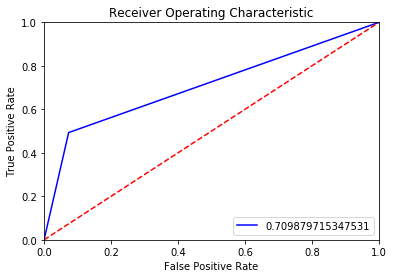

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc) #values of x and y to be defined b is for blue
plt.legend(loc = 'lower right') #location of the legend
plt.plot([0, 1], [0, 1],'r--')  #x cordinate 0,0 and y cordinate1,1 daignoal plot line
plt.xlim([0, 1]) #limitations
plt.ylim([0, 1]) 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show() 

#if auc value =0.5 worst model
                          #=0.5-0.6=poor
                          #0.6-0.7=bad
                          #0.7-0.8=good
                          #0.8-0.9=vgood
                           #0.9-1=excellent

In [36]:
from sklearn import metrics

fpr,tpr, z=metrics.roc_curve(Y_test,y_pred_prob[:,1])     #inorder to decide the best threshold from the probability matrix
auc=metrics.auc(fpr,tpr)
print(auc)
print(z)
print(fpr)
print(tpr)

0.8510128825880344
[2.00000000e+00 1.00000000e+00 1.00000000e+00 ... 3.10225942e-03
 3.09956648e-03 6.46531577e-04]
[0.         0.         0.         ... 0.99555436 0.99582379 1.        ]
[0.00000000e+00 8.52514919e-04 2.55754476e-03 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


NameError: name 'fpr' is not defined

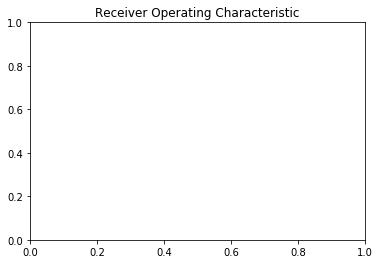

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc) #values of x and y to be defined b is for blue
plt.legend(loc = 'lower right') #location of the legend
plt.plot([0, 1], [0, 1],'r--')  #x cordinate 0,0 and y cordinate1,1 daignoal plot line
plt.xlim([0, 1]) #limitations
plt.ylim([0, 1]) 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show() 

In [39]:
#Using cross validation

classifier=(LogisticRegression())

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10)
print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())




KFold(n_splits=10, random_state=None, shuffle=False)


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

[0.81842105 0.81403509 0.81790259 0.85037297 0.82974989 0.82492321
 0.80824923 0.8174638  0.83106626 0.82843352]
0.8240617614681722


In [41]:
for train_value, test_value in kfold_cv.split(X_train):
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])


Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

In [45]:
from sklearn.metrics import confusion_matrix ,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
acc=accuracy_score(Y_test,Y_pred)
print("accuracy of the model:",acc)
print(classification_report(Y_test,Y_pred))

[[7016  407]
 [1315 1031]]
accuracy of the model: 0.8237281195618794
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7423
           1       0.72      0.44      0.54      2346

   micro avg       0.82      0.82      0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769



In [46]:
colname=adult_df_rev.columns[:]

 

from sklearn.feature_selection import RFE
rfe = RFE(classifier, 8)
model_rfe = rfe.fit(X_train, Y_train)
print("Num Features: ",model_rfe.n_features_)
print("Selected Features: ") 
print(list(zip(colname, model_rfe.support_))) #variables eliminated and retained so zip with the column name 
print("Feature Ranking: ", model_rfe.ranking_) #retained ranks have no 1

 

Y_istpred=model_rfe.predict(X_test)
9l#print(list(zip(Y_test,Y_pred)))

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Num Features:  8
Selected Features: 
[('age', True), ('workclass', False), ('education_num', True), ('marital_status', True), ('occupation', False), ('relationship', True), ('race', False), ('sex', True), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', False)]
Feature Ranking:  [1 3 1 1 4 1 2 1 1 1 1 5]


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [47]:
Y_pred=model_rfe.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

In [48]:
from sklearn.metrics import confusion_matrix ,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
acc=accuracy_score(Y_test,Y_pred)
print("accuracy of the model:",acc)
print(classification_report(Y_test,Y_pred))

[[7011  412]
 [1323 1023]]
accuracy of the model: 0.8223973794656567
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7423
           1       0.71      0.44      0.54      2346

   micro avg       0.82      0.82      0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769



In [ ]:
"""new_data=adult_df_rev[['age','workclass','occupation','sex','income']]
new_data.head()
new_X=new_data.values[:,:-1]
new_Y=new_data.values[:,-1]
print(new_X)
print(new_Y)
"""   #using the important variable ourself and what the model suggested

In [49]:
X = adult_df_rev.values[:,:-1]
Y = adult_df_rev.values[:,-1]

In [50]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


test = SelectKBest(score_func=chi2, k=7)
fit1 = test.fit(X, Y)

print(fit1.scores_)
print(list(zip(colname,fit1.get_support())))
X = fit1.transform(X)

print(X)

[8.60061182e+03 9.35436386e-02 2.40142178e+03 1.12346982e+03
 1.00356439e+02 3.65914312e+03 3.30313051e+01 5.02439419e+02
 8.21924671e+07 1.37214589e+06 6.47640900e+03 1.74341889e+01]
[('age', True), ('workclass', False), ('education_num', True), ('marital_status', True), ('occupation', False), ('relationship', True), ('race', False), ('sex', False), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', False)]
[[   39    13     4 ...  2174     0    40]
 [   50    13     2 ...     0     0    13]
 [   38     9     0 ...     0     0    40]
 ...
 [   58     9     6 ...     0     0    40]
 [   22     9     4 ...     0     0    20]
 [   52     9     2 ... 15024     0    40]]


In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10) #random state to have a same data every time we run

In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score,\
classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)

print("accuracy of the model:",acc)



[[7023  400]
 [1361  985]]
classification report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7423
           1       0.71      0.42      0.53      2346

   micro avg       0.82      0.82      0.82      9769
   macro avg       0.77      0.68      0.71      9769
weighted avg       0.81      0.82      0.80      9769

accuracy of the model: 0.8197358992732112


In [53]:
from sklearn.linear_model import LogisticRegression
#creating a model

classifier=LogisticRegression()
 

#fitiing training data to the model

classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

print(classifier.coef_)
print(classifier.intercept_)

[[ 0.4514169   0.83587188 -0.34929323 -0.4400932   2.43539991  0.28823952
   0.39846433]]
[-1.46758817]


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [59]:

#work upon the original data not the scaled one for using variable selection feature


In [56]:
X=adult_df_rev.values[:,:-1]
Y=adult_df_rev.values[:,-1]

In [58]:
from sklearn.feature_selection import VarianceThreshold

 

#scaling required
vt = VarianceThreshold(0.0)  #threshold limit till 0.3
fit1 = vt.fit(X, Y)
print(fit1.variances_)

features = fit1.transform(X)
print(features)
print(features.shape[1])
print(list(zip(colname,fit1.get_support())))

[1.86055686e+02 1.22584081e+00 6.61868663e+00 2.26863420e+00
 1.57819202e+01 2.58163360e+00 7.20448827e-01 2.21369502e-01
 5.45408641e+07 1.62371951e+05 1.52454313e+02 3.66745732e+01]
[[39  6 13 ...  0 40 38]
 [50  5 13 ...  0 13 38]
 [38  3  9 ...  0 40 38]
 ...
 [58  3  9 ...  0 40 38]
 [22  3  9 ...  0 20 38]
 [52  4  9 ...  0 40 38]]
12
[('age', True), ('workclass', True), ('education_num', True), ('marital_status', True), ('occupation', True), ('relationship', True), ('race', True), ('sex', True), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', True)]


KeyError: "None of [Index(['fnlwgt'], dtype='object')] are in the [columns]"

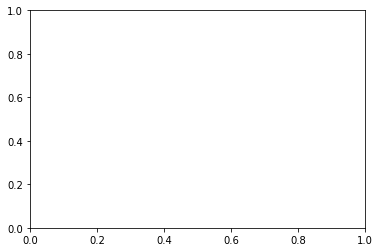

In [4]:
adult_df.boxplot(column='fnlwgt')
plt.show()